## 1. Introduction

### i. Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Pre-Processing and feature engineering
- Model Training
- Choose best model

### ii. Problem statement
- In the fiercely competitive telecommunication industry, customer churn poses a significant challenge for service providers. Churn, the rate at which customers discontinue their subscription or switch to competitors, not only impacts revenue but also reflects customer dissatisfaction and service quality. To mitigate churn and improve customer retention, this project aims to leverage machine learning techniques to identify and predict potential churners accurately.

### iii. Objective
- The objective of this project is to develop a robust machine learning churn analysis model that can proactively identify customers at risk of churning. By accurately predicting churn, we can implement targeted retention strategies, personalized offers, and improved customer service, thereby reducing churn rates and increasing customer loyalty.

### iv. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/blastchar/telco-customer-churn


### v Data Content

- Customers who left within the last month – the column is called Churn.


- Services that each customer has signed up for i.e., phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.


- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.


- Demographic info about customers – gender, age range, and if they have partners and dependents.

### 1.7 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

#### Import the CSV Data as Pandas DataFrame

In [138]:
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import seaborn as sns
import matplotlib.pyplot as plt   # For 2D visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import os
import gc
import random
from collections import Counter
from scipy import stats                         # For statistics
from scipy.stats.contingency import association 
from sklearn.feature_selection import chi2
import multiprocessing

In [139]:
# customize as needed
plt_params = {
               'axes.facecolor' : 'white'
                                          }
plt.rcParams.update(plt_params)

In [140]:
# padding value to print left padded string
left_padding = 21


#### Import the CSV Data as Pandas DataFrame

In [141]:
df = pd.read_csv('D:\MACHINE LEARNING PROJECT (GITHUB)\Machine-learning-end-to-end-project\customer_data.csv')

In [142]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data summary on a pivot table

In [144]:
from pivottablejs import pivot_ui

pivot_ui(df)

## 1. General Exploratory Data Analysis

In [145]:
def check_df(dataframe, head=5):
    print("######### SHAPE #######")
    print(dataframe.shape)
    
    print("######### DATA TYPES #######")
    print(dataframe.dtypes)
    
    print("######### N/A ##########")
    print(dataframe.isnull().sum())
    
    print("###### QUARTILES ######")
    print(dataframe.quantile([0.25, 0.50, 0.75]).T)
    
    print("##### NUMBER OF UNIQUE VALUES #####")
    print(dataframe.nunique())

In [146]:
check_df(df)

######### SHAPE #######
(7043, 21)
######### DATA TYPES #######
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
######### N/A ##########
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
S

In [147]:
#import sketch
#df2 = df[['Churn','MonthlyCharges','TotalCharges']]

#df2.sketch.howto("plot the distributions of Churn on MonthlyCharges and TotalCharges use cdf and kde= Churn")

In [148]:
#!pip install sketch

* **Insights** 
- TotalCharges and Churn data types need to be converted from __object__ to __float64__ or __int64__.


- The __first quartile (Q1)__ is the value below which 25% of the data points lie. The __second quartile (Q2)__ is the median, or the value below which 50% of the data points lie. The __third quartile (Q3)__ is the value below which 75% of the data points lie.


- In the case of __SeniorCitizen__, all of the data points are equal to 0, so all of the quartiles are also equal to Young Adult.


- In the case of __tenure__, 25% of the data points are below 9 months, 50% of the data points are below 29 months, and 75% of the data points are below 55 months.


- In the case of __MonthlyCharges__, 25% of the data points are below 35.5, 50% of the data points are below 70.35, and 75% of the data points are below 89.85.

In [149]:
# Change total charges from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [150]:
# We need 1 and 0 instead of yes and no
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [151]:
df.dropna(inplace=True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [153]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [154]:
# drop customer ID
del df["customerID"]

In [155]:
# Functions to categorize columns based on datatypes
def get_numerical_columns(df):
    numerical_columns = []
    
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            numerical_columns.append((column, df[column].nunique()))
    
    return numerical_columns

def get_dichotomous_columns(df):
    dichotomous_columns = []
    
    for column in df.columns:
        if df[column].dtype == 'object' and df[column].nunique() == 2:
            dichotomous_columns.append((column, df[column].nunique()))
    
    return dichotomous_columns

def get_polytomous_columns(df):
    polytomous_columns = []
    
    for column in df.columns:
        if df[column].dtype == 'object' and df[column].nunique() > 2:
            polytomous_columns.append((column, df[column].nunique()))
    
    return polytomous_columns

In [156]:
# Obtain numerical columns
numerical_cols = get_numerical_columns(df)

# Obtain dichotomous columns
dichotomous_cols = get_dichotomous_columns(df)

# Obtain polytomous columns
polytomous_cols = get_polytomous_columns(df)

# Print numerical columns and their unique values
print("Numerical Columns:")
for column, unique_values in numerical_cols:
    print(f"{column}: {unique_values} unique values")

print("=======================================")

# Print dichotomous columns and their unique values
print("\nDichotomous Columns:")
for column, unique_values in dichotomous_cols:
    print(f"{column}: {unique_values} unique values")

print("=======================================")

# Print polytomous columns and their unique values
print("\nPolytomous Columns:")
for column, unique_values in polytomous_cols:
    print(f"{column}: {unique_values} unique values")


Numerical Columns:
SeniorCitizen: 2 unique values
tenure: 72 unique values
MonthlyCharges: 1584 unique values
TotalCharges: 6530 unique values
Churn: 2 unique values

Dichotomous Columns:
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
PaperlessBilling: 2 unique values

Polytomous Columns:
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaymentMethod: 4 unique values


## **2. EDA of Numerical Variables**

### 2.1 **Univariate Analysis**

In [157]:
def num_summary(dataframe, numerical_columns, plot=False):
    # Set the desired quantiles for the summary statistics
    quantiles = [0.25, 0.50, 0.75]
    
    # Compute and print the summary statistics for the numerical columns
    summary = dataframe[numerical_columns].describe(quantiles).T
    print(summary)
    
    # If plot is True, generate and display a histogram for each numerical column
    if plot:
        dataframe[numerical_columns].hist(bins=20)
        
        # Set the x-axis label and title for the histogram
        plt.xlabel(numerical_columns)
        plt.title(numerical_columns)
        
        # Display the histogram
        plt.show()


count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64


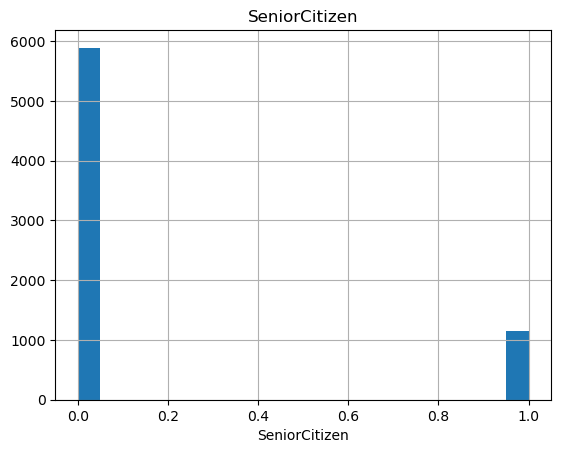

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


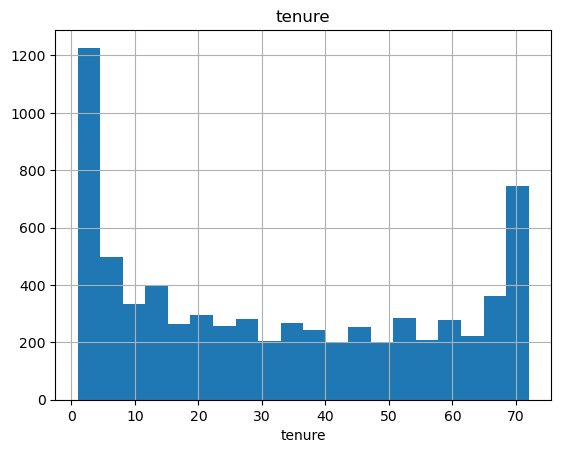

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64


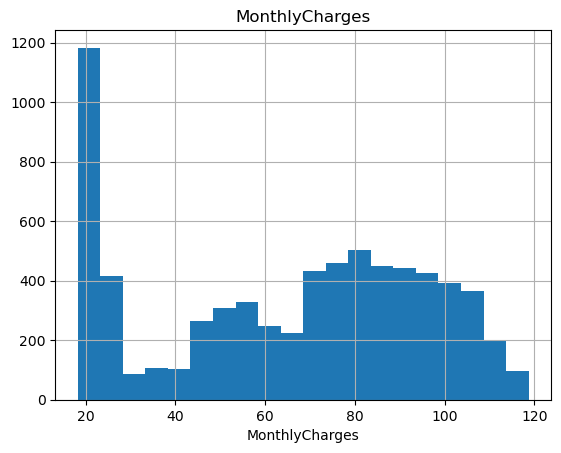

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


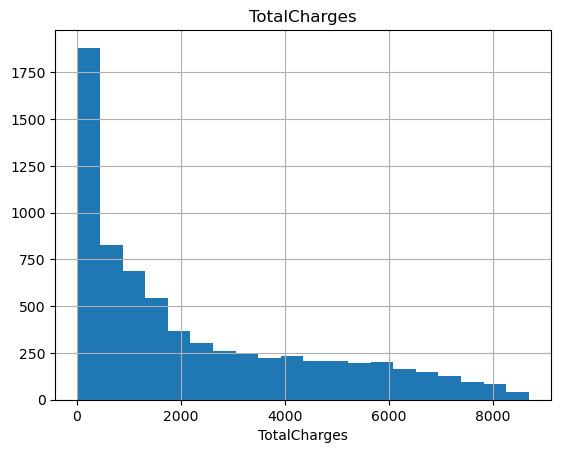

count    7032.000000
mean        0.265785
std         0.441782
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64


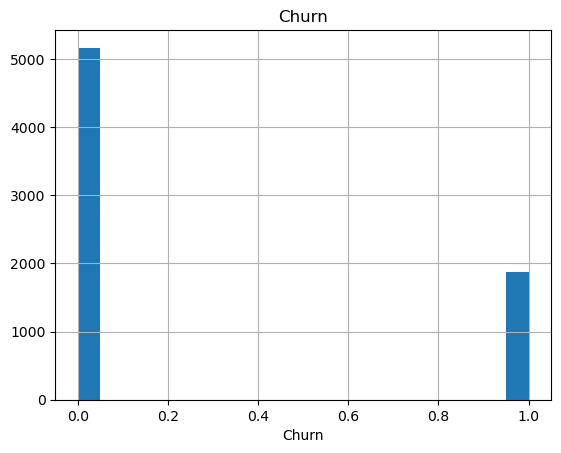

In [158]:
num_cols = [column for column, _ in numerical_cols]  # Extracting column names from numerical_cols

for col in num_cols:
    num_summary(df, col, plot=True)

**Insights**

* **Senior Citizen** - Most customers are youth adults.

* **Tenure** - Below ten years and above sixty years are important segments 

* **Monthly Charges** - 20 and 80 per month are important monthly charges to analyse for churn.

* **Total Charges** - Below 2000 total charges need to be thoroughly explored for churn.

#### **2.2 Target Variable Analysis**

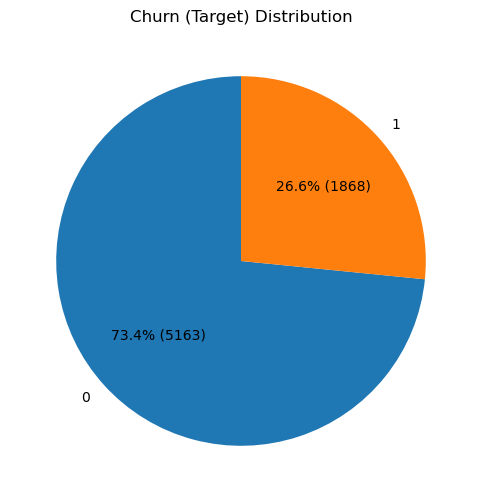

In [159]:

# Convert DataFrame to seaborn-compatible format
data = df['Churn'].value_counts().reset_index().rename(columns={'index':'Type'})

# Plot the pie chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(x=data['Churn'], labels=data['Type'], autopct=lambda pct: f"{pct:.1f}% ({int(pct/100*sum(data['Churn']))})", startangle=90)
plt.title('Churn (Target) Distribution')
plt.show()


### 2.3 Numerical variables according to the target variable

In [160]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [161]:
for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       SeniorCitizen
Churn               
0           0.128995
1           0.254682


          tenure
Churn           
0      37.650010
1      17.979133


       MonthlyCharges
Churn                
0           61.307408
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094


       Churn
Churn       
0        0.0
1        1.0




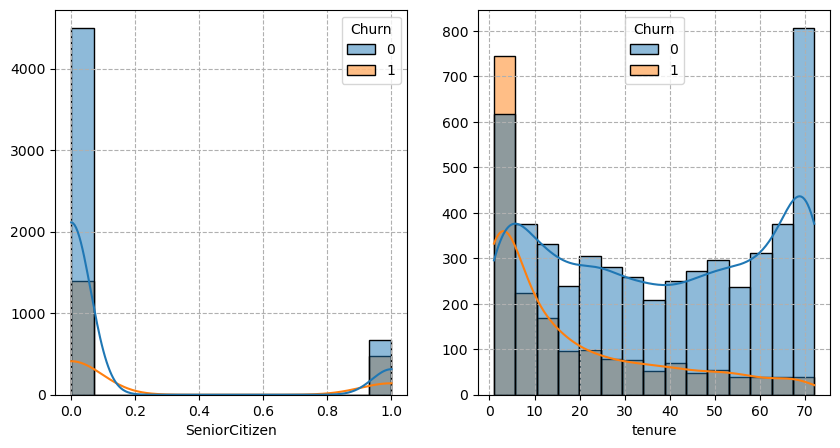

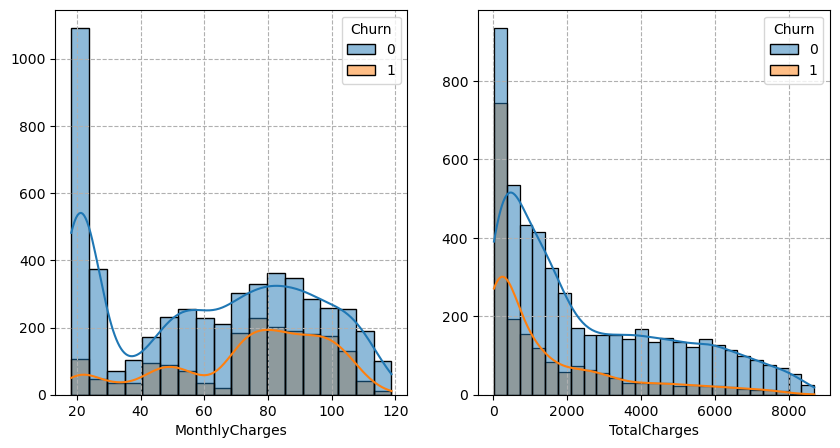

In [162]:
# Iterate over numerical columns, skipping every other column
for i in range(0, len(num_cols)-1, 2):
    # Create a figure and two subplots
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot a histogram on the first subplot
    sns.histplot(df, x=num_cols[i], hue="Churn", kde=True, ax=ax[0])
    
    # Check if there is another numerical column available
    if i+1 < len(num_cols):
        # Plot a histogram on the second subplot
        sns.histplot(df, x=num_cols[i+1], hue="Churn", kde=True, ax=ax[1])

    # Apply gridlines to both subplots
    for ax in ax:
        ax.grid(True, which='both', linestyle='--')
        # Remove the y-axis label
        ax.set(ylabel='')


### Density plots

Text(0.5, 1.0, 'Monthly charges by churn')

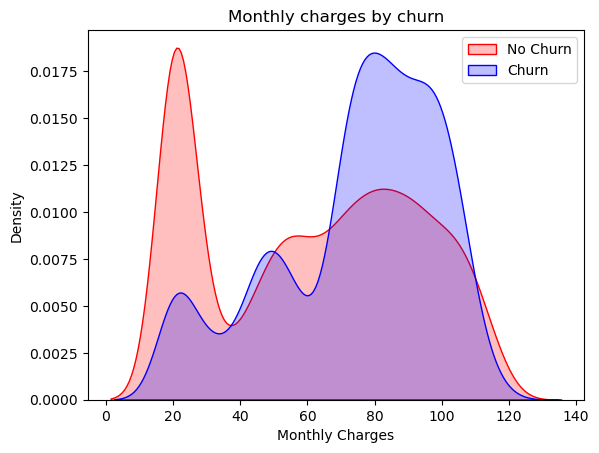

In [163]:
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0)], color="Red", shade=True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1)], ax=Mth, color="Blue", shade=True)
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

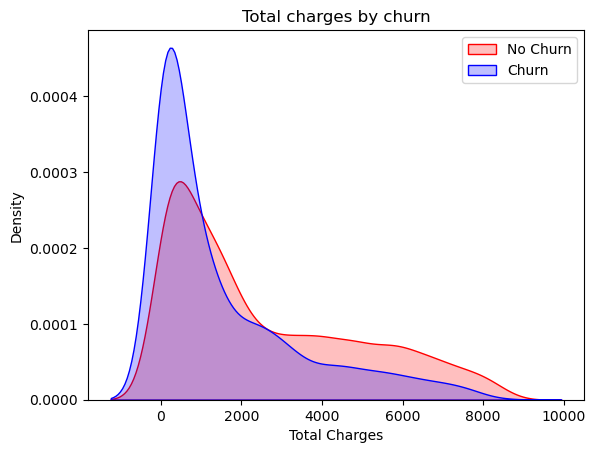

In [164]:
Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0)], color="Red", shade=True)
Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1)], ax=Tot, color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Text(0.5, 1.0, 'Senior Citizen by churn')

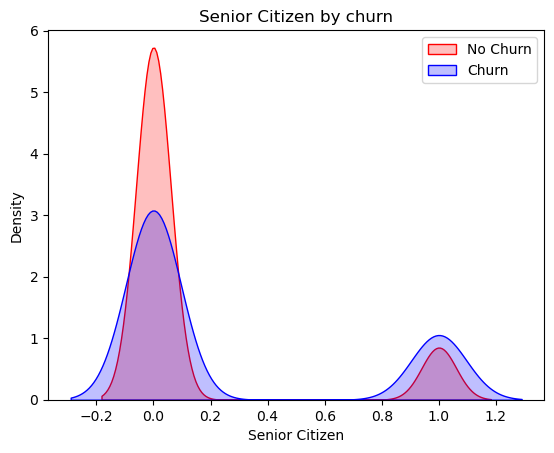

In [165]:
Tot = sns.kdeplot(df.SeniorCitizen[(df["Churn"] == 0)], color="Red", shade=True)
Tot = sns.kdeplot(df.SeniorCitizen[(df["Churn"] == 1)], ax=Tot, color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Senior Citizen')
Tot.set_title('Senior Citizen by churn')

Text(0.5, 1.0, 'Tenure by churn')

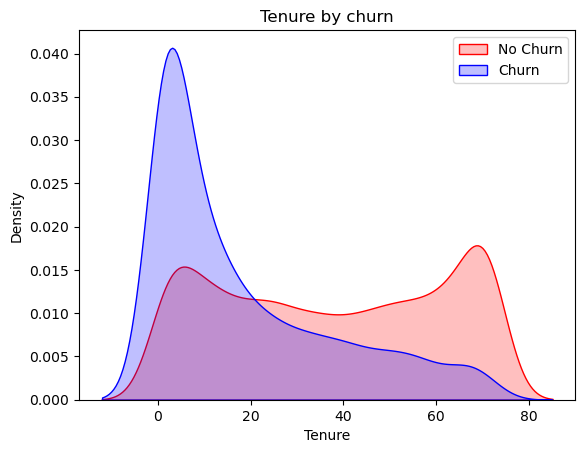

In [166]:
Tot = sns.kdeplot(df.tenure[(df["Churn"] == 0)], color="Red", shade=True)
Tot = sns.kdeplot(df.tenure[(df["Churn"] == 1)], ax=Tot, color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Tenure')
Tot.set_title('Tenure by churn')

## 3. EDA of Categorical Variables

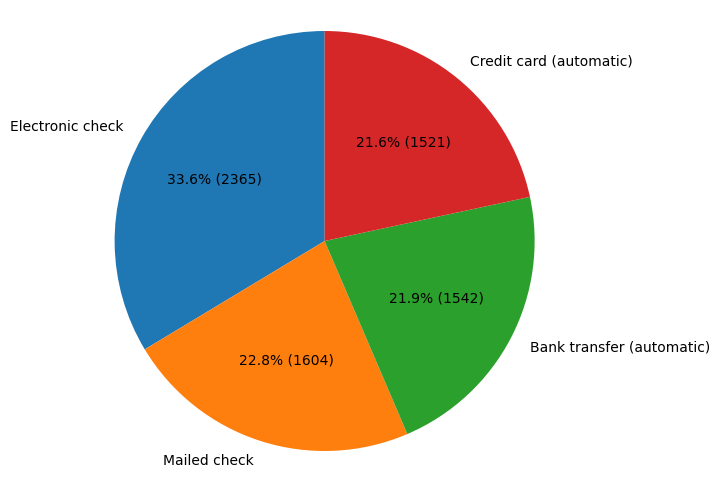

In [167]:
# Calculate the value counts for each payment method
payment_counts = df['PaymentMethod'].value_counts().reset_index().rename(columns={'index':'Type', 'PaymentMethod': 'Count'})

# Plot the pie chart using matplotlib
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(payment_counts['Count'], labels=payment_counts['Type'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
#plt.title()

# Add numbers next to percentages
for i, autotext in enumerate(autotexts):
    autotext.set_text(f"{autotext.get_text()} ({payment_counts['Count'].iloc[i]})")

# Display the Markdown heading and the pie chart
plt.show()

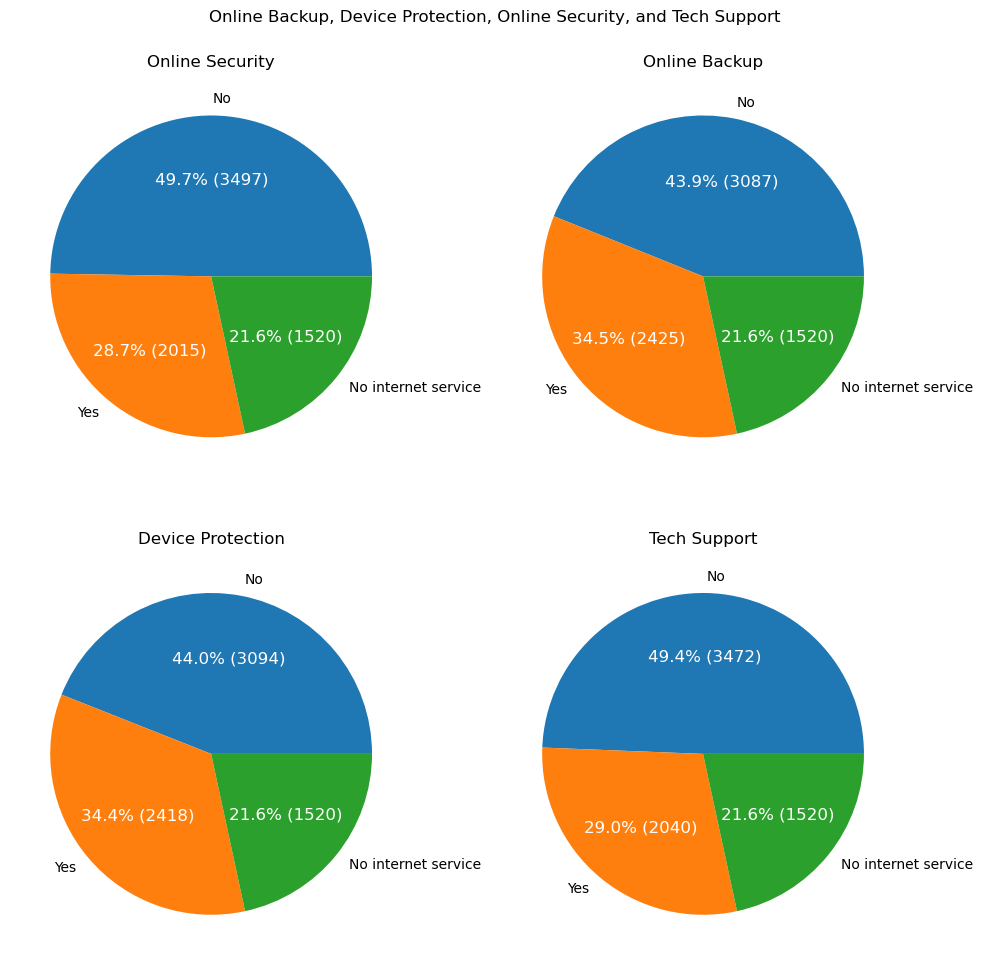

In [168]:
# Calculate the value counts for each category
online_security_counts = df['OnlineSecurity'].value_counts()
online_backup_counts = df['OnlineBackup'].value_counts()
device_protection_counts = df['DeviceProtection'].value_counts()
tech_support_counts = df['TechSupport'].value_counts()

# Create subplots with a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the pie chart for Online Security
_, _, autotexts = axs[0, 0].pie(online_security_counts, labels=online_security_counts.index, autopct='%1.1f%%')
axs[0, 0].set_title('Online Security')

# Add numbers next to percentages
for autotext, count in zip(autotexts, online_security_counts):
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_text(f"{autotext.get_text()} ({count})")

# Plot the pie chart for Online Backup
_, _, autotexts = axs[0, 1].pie(online_backup_counts, labels=online_backup_counts.index, autopct='%1.1f%%')
axs[0, 1].set_title('Online Backup')

# Add numbers next to percentages
for autotext, count in zip(autotexts, online_backup_counts):
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_text(f"{autotext.get_text()} ({count})")

# Plot the pie chart for Device Protection
_, _, autotexts = axs[1, 0].pie(device_protection_counts, labels=device_protection_counts.index, autopct='%1.1f%%')
axs[1, 0].set_title('Device Protection')

# Add numbers next to percentages
for autotext, count in zip(autotexts, device_protection_counts):
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_text(f"{autotext.get_text()} ({count})")

# Plot the pie chart for Tech Support
_, _, autotexts = axs[1, 1].pie(tech_support_counts, labels=tech_support_counts.index, autopct='%1.1f%%')
axs[1, 1].set_title('Tech Support')

# Add numbers next to percentages
for autotext, count in zip(autotexts, tech_support_counts):
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_text(f"{autotext.get_text()} ({count})")

# Add a super title
fig.suptitle('Online Backup, Device Protection, Online Security, and Tech Support')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

### 3.1.2 Count of dichotomous variables

In [169]:
# Calculate the value counts for each category
gender_counts = df['gender'].value_counts()
partner_counts = df['Partner'].value_counts()
dependents_counts = df['Dependents'].value_counts()
phone_service_counts = df['PhoneService'].value_counts()
paperless_billing_counts = df['PaperlessBilling'].value_counts()

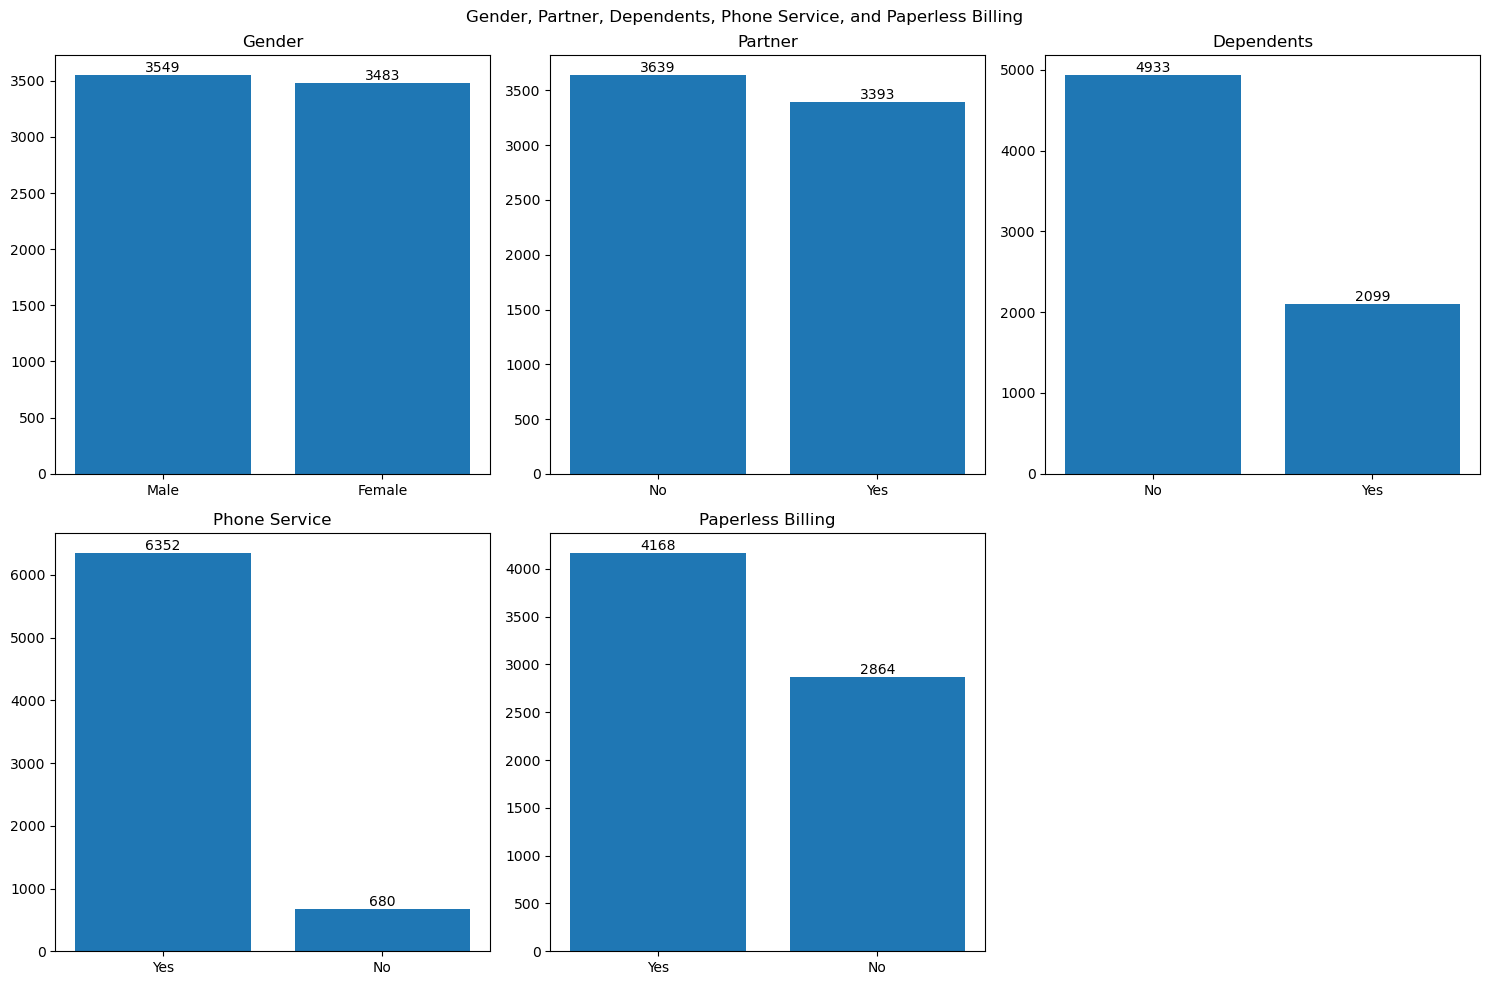

In [170]:
# Create subplots with a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the bar chart for Gender
axs[0, 0].bar(gender_counts.index, gender_counts.values)
axs[0, 0].set_title('Gender')

# Add numbers on top of the bars
for i, count in enumerate(gender_counts.values):
    axs[0, 0].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Partner
axs[0, 1].bar(partner_counts.index, partner_counts.values)
axs[0, 1].set_title('Partner')

# Add numbers on top of the bars
for i, count in enumerate(partner_counts.values):
    axs[0, 1].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Dependents
axs[0, 2].bar(dependents_counts.index, dependents_counts.values)
axs[0, 2].set_title('Dependents')

# Add numbers on top of the bars
for i, count in enumerate(dependents_counts.values):
    axs[0, 2].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Phone Service
axs[1, 0].bar(phone_service_counts.index, phone_service_counts.values)
axs[1, 0].set_title('Phone Service')

# Add numbers on top of the bars
for i, count in enumerate(phone_service_counts.values):
    axs[1, 0].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Paperless Billing
axs[1, 1].bar(paperless_billing_counts.index, paperless_billing_counts.values)
axs[1, 1].set_title('Paperless Billing')

# Add numbers on top of the bars
for i, count in enumerate(paperless_billing_counts.values):
    axs[1, 1].text(i, count, str(count), ha='center', va='bottom')

# Hide the empty subplot
axs[1, 2].axis('off')

# Add a super title
fig.suptitle('Gender, Partner, Dependents, Phone Service, and Paperless Billing')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

### 3.1.3 Dichotomous variables according to the target variable

In [171]:
# Define the chart variables
variables = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Calculate churn percentages for each variable and churn status
churn_perc = {}
for variable in variables:
    churn_perc[variable] = df.groupby(variable)['Churn'].value_counts(normalize=True).unstack() * 100

# Calculate the number of rows and columns for subplots
num_plots = len(variables)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

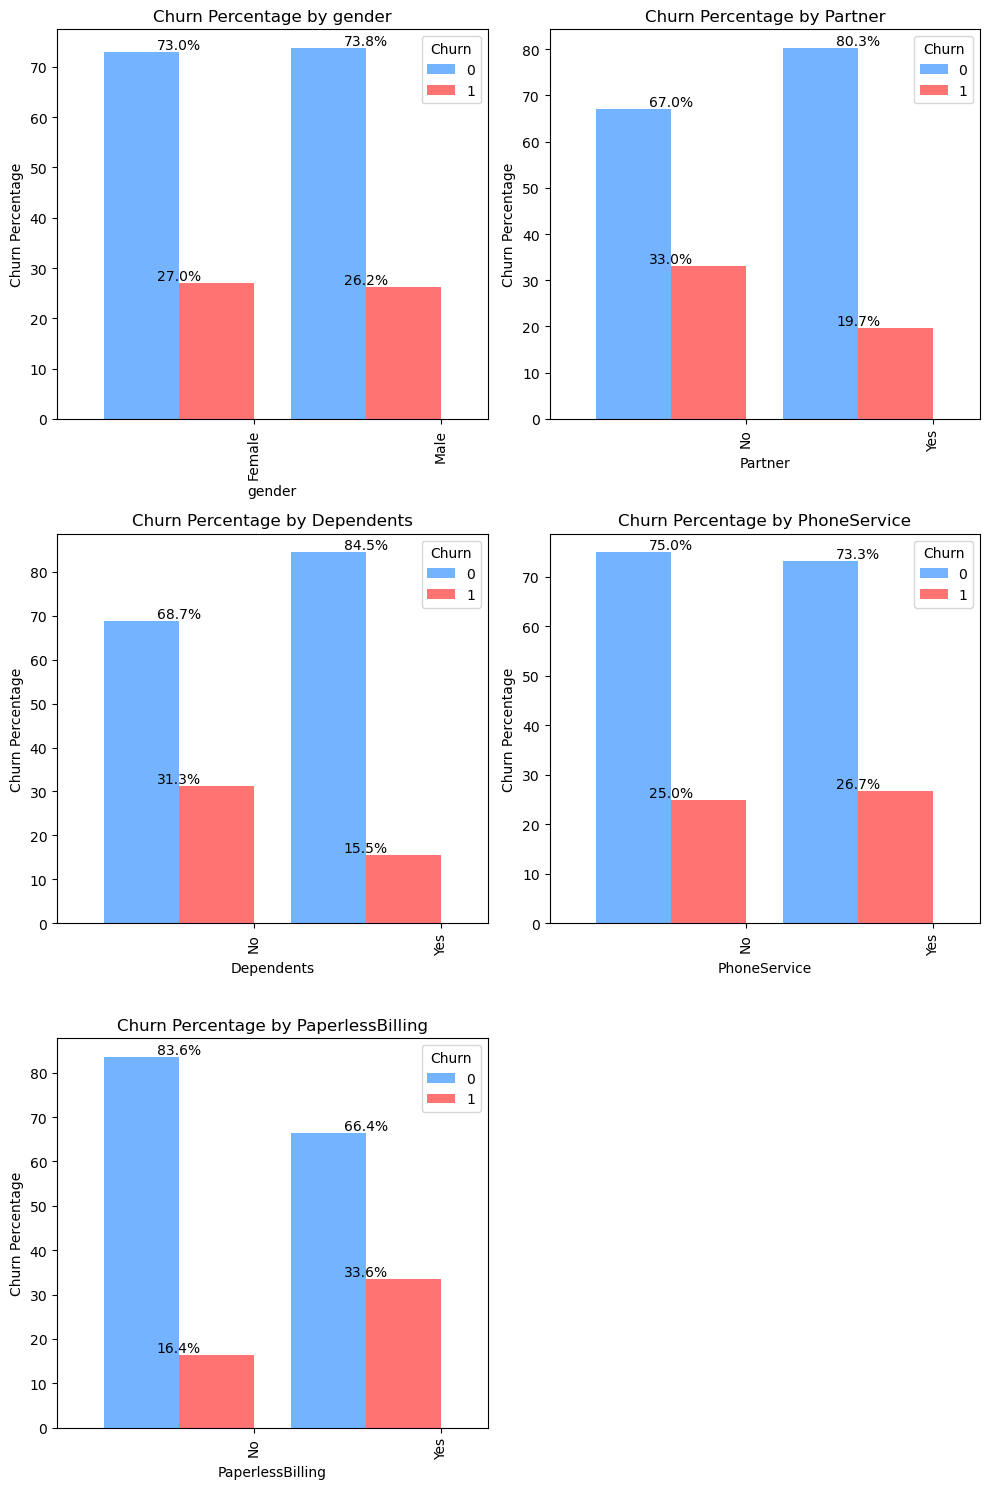

In [172]:
# Plot side-by-side bar charts for each variable
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

bar_width = 0.8

for i, variable in enumerate(variables):
    ax = axs[i // num_cols, i % num_cols]  # Calculate the subplot position in the grid
    churn_perc[variable].plot(kind='bar', color=['#73B3FF', '#FF7373'], ax=ax, width=bar_width, position=1)
    ax.set_xlabel(variable)
    ax.set_ylabel('Churn Percentage')
    ax.set_title(f'Churn Percentage by {variable}')
    
    # Add percentage labels at the top middle of each bar
    for j, (_, row) in enumerate(churn_perc[variable].iterrows()):
        for col_name, perc in row.iteritems():
            if not pd.isnull(perc):
                ax.text(j - bar_width/2, perc, f'{perc:.1f}%', ha='center', va='bottom')

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


### 3.2 Count of Polytomous  variables

In [173]:
# Calculate the value counts for each category
multiple_lines_counts = df['MultipleLines'].value_counts()
internet_service_counts = df['InternetService'].value_counts()
online_security_counts = df['OnlineSecurity'].value_counts()
online_backup_counts = df['OnlineBackup'].value_counts()
device_protection_counts = df['DeviceProtection'].value_counts()
tech_support_counts = df['TechSupport'].value_counts()
streaming_tv_counts = df['StreamingTV'].value_counts()
streaming_movies_counts = df['StreamingMovies'].value_counts()
contract_counts = df['Contract'].value_counts()
payment_method_counts = df['PaymentMethod'].value_counts()

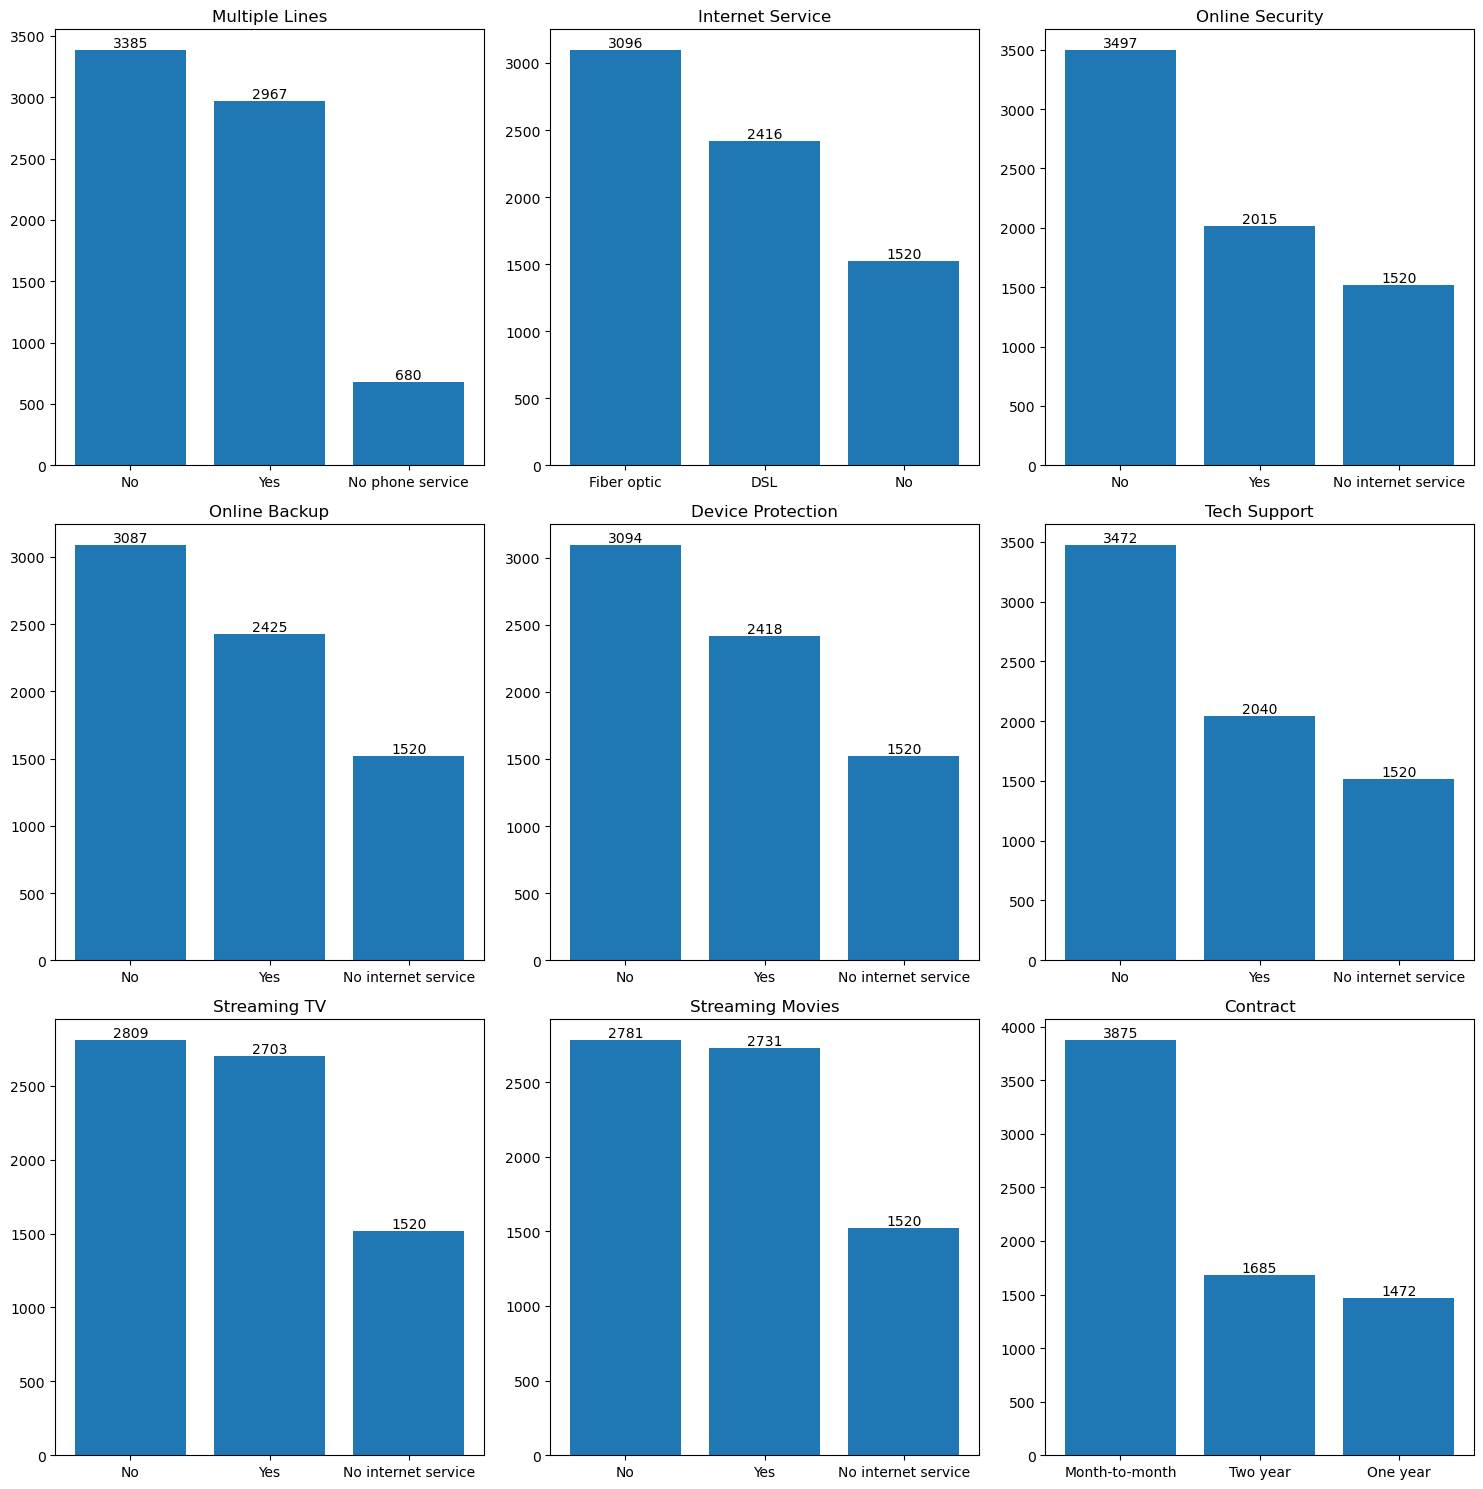

In [174]:
# Create subplots with a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot the bar chart for Multiple Lines
axs[0, 0].bar(multiple_lines_counts.index, multiple_lines_counts.values)
axs[0, 0].set_title('Multiple Lines')

# Add numbers on top of the bars
for i, count in enumerate(multiple_lines_counts.values):
    axs[0, 0].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Internet Service
axs[0, 1].bar(internet_service_counts.index, internet_service_counts.values)
axs[0, 1].set_title('Internet Service')

# Add numbers on top of the bars
for i, count in enumerate(internet_service_counts.values):
    axs[0, 1].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Online Security
axs[0, 2].bar(online_security_counts.index, online_security_counts.values)
axs[0, 2].set_title('Online Security')

# Add numbers on top of the bars
for i, count in enumerate(online_security_counts.values):
    axs[0, 2].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Online Backup
axs[1, 0].bar(online_backup_counts.index, online_backup_counts.values)
axs[1, 0].set_title('Online Backup')

# Add numbers on top of the bars
for i, count in enumerate(online_backup_counts.values):
    axs[1, 0].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Device Protection
axs[1, 1].bar(device_protection_counts.index, device_protection_counts.values)
axs[1, 1].set_title('Device Protection')

# Add numbers on top of the bars
for i, count in enumerate(device_protection_counts.values):
    axs[1, 1].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Tech Support
axs[1, 2].bar(tech_support_counts.index, tech_support_counts.values)
axs[1, 2].set_title('Tech Support')

# Add numbers on top of the bars
for i, count in enumerate(tech_support_counts.values):
    axs[1, 2].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Streaming TV
axs[2, 0].bar(streaming_tv_counts.index, streaming_tv_counts.values)
axs[2, 0].set_title('Streaming TV')

# Add numbers on top of the bars
for i, count in enumerate(streaming_tv_counts.values):
    axs[2, 0].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Streaming Movies
axs[2, 1].bar(streaming_movies_counts.index, streaming_movies_counts.values)
axs[2, 1].set_title('Streaming Movies')

# Add numbers on top of the bars
for i, count in enumerate(streaming_movies_counts.values):
    axs[2, 1].text(i, count, str(count), ha='center', va='bottom')

# Plot the bar chart for Contract
axs[2, 2].bar(contract_counts.index, contract_counts.values)
axs[2, 2].set_title('Contract')

# Add numbers on top of the bars
for i, count in enumerate(contract_counts.values):
    axs[2, 2].text(i, count, str(count), ha='center', va='bottom')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


### 3.4 Polytomous variables according to the target variable

In [175]:
# Define the chart variables

variables = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

# Calculate churn percentages for each variable and churn status
churn_perc = {}
for variable in variables:
    churn_perc[variable] = df.groupby(variable)['Churn'].value_counts(normalize=True).unstack() * 100

# Calculate the number of rows and columns for subplots
num_plots = len(variables)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

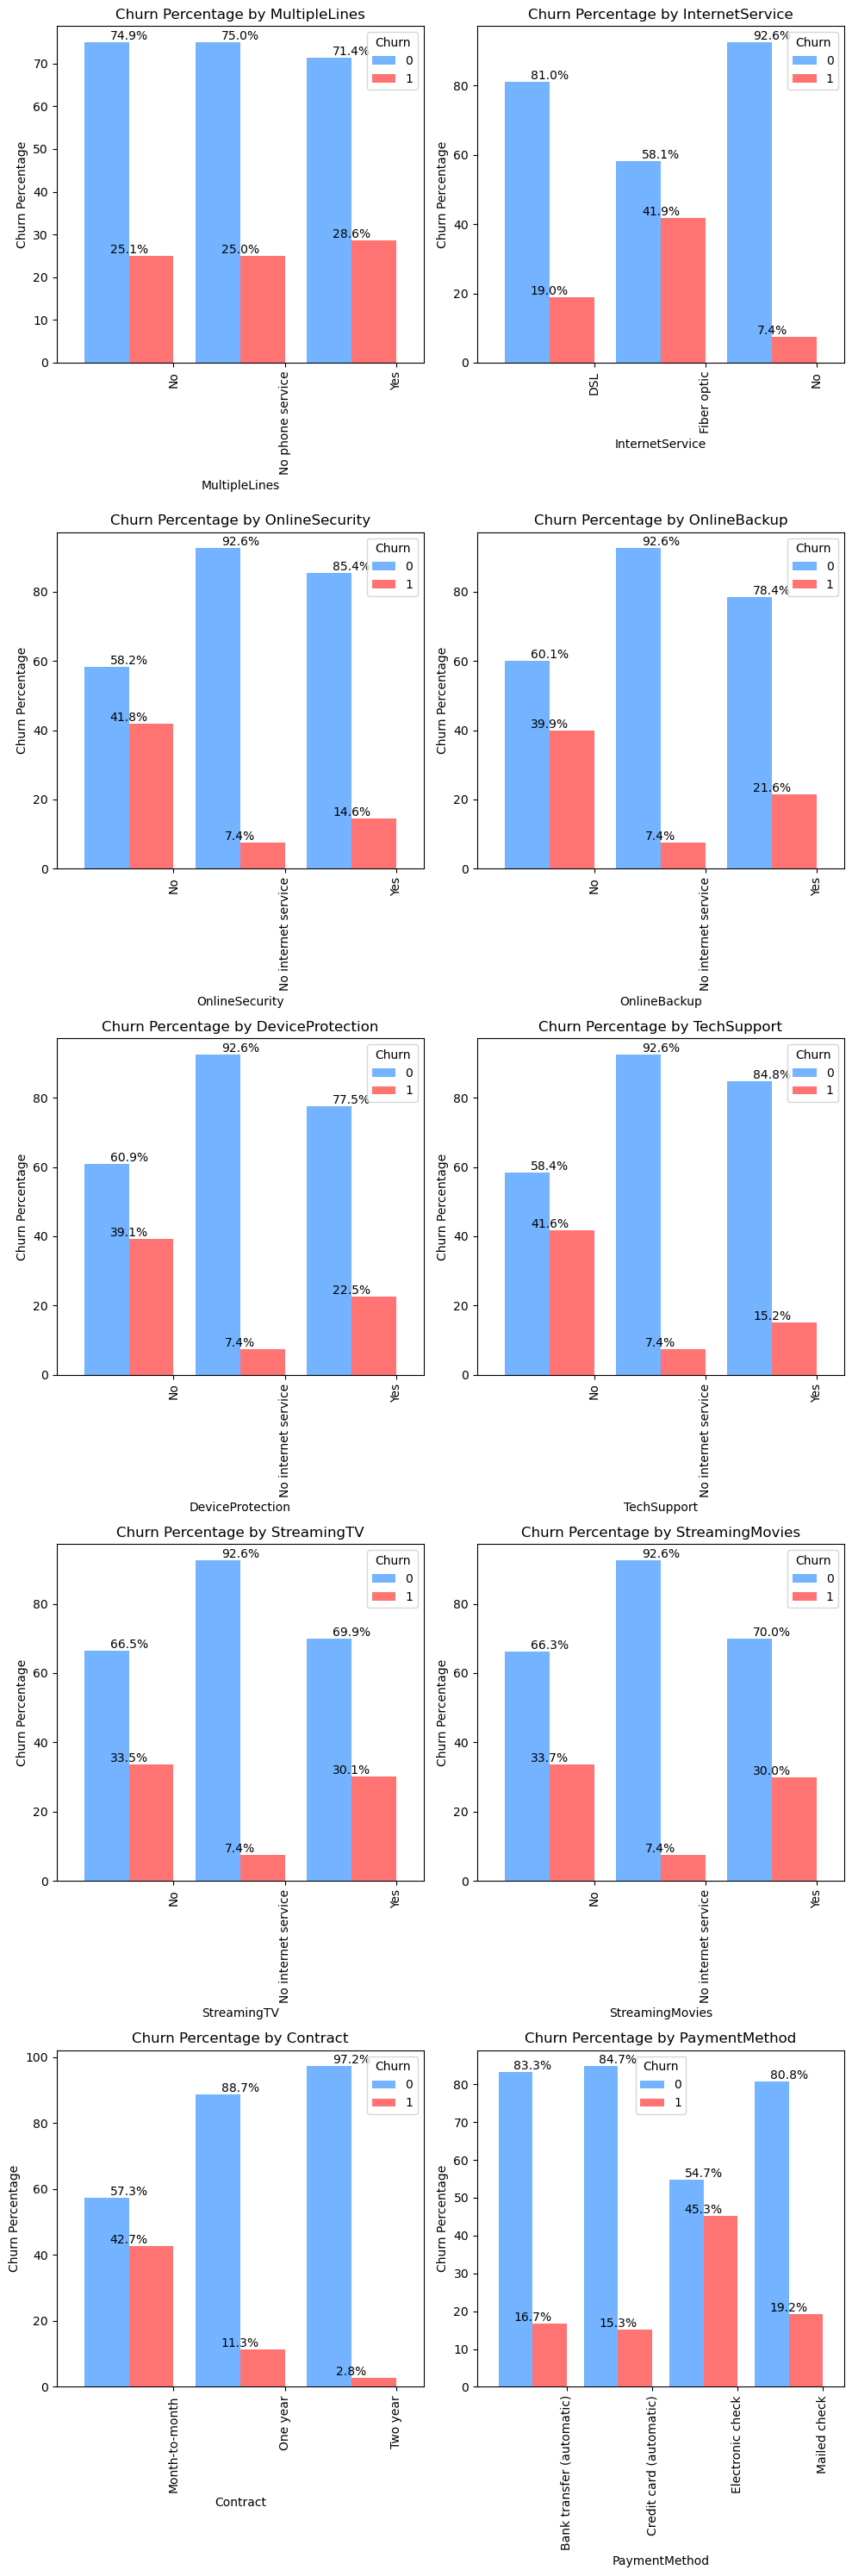

In [176]:
# Plot side-by-side bar charts for each variable
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 6 * num_rows))

bar_width = 0.8

for i, variable in enumerate(variables):
    ax = axs[i // num_cols, i % num_cols]  # Calculate the subplot position in the grid
    churn_perc[variable].plot(kind='bar', color=['#73B3FF', '#FF7373'], ax=ax, width=bar_width, position=1)
    ax.set_xlabel(variable)
    ax.set_ylabel('Churn Percentage')
    ax.set_title(f'Churn Percentage by {variable}')
    
    # Add percentage labels at the top middle of each bar
    for j, (_, row) in enumerate(churn_perc[variable].iterrows()):
        for col_name, perc in row.iteritems():
            if not pd.isnull(perc):
                ax.text(j - bar_width/2, perc, f'{perc:.1f}%', ha='center', va='bottom')

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


### 4. Outlier Checking

In [177]:
# Get numerical variables 
numerical_data = df.select_dtypes(include='number')

# Exclude dummy variables 
non_dummy_columns = numerical_data[[column for column in numerical_data if not df[column].isin([0, 1]).all()]]
non_dummy_columns.head()


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [178]:
# Calculate the interquartile range (IQR) for each column
Q1 = non_dummy_columns.quantile(0.25)
Q3 = non_dummy_columns.quantile(0.75)
IQR = Q3 - Q1

In [179]:
# Define a threshold to identify outliers (e.g., 1.5 times the IQR)
outlier_threshold = 1.5

# Find outliers by comparing values to the threshold
outliers = (non_dummy_columns < (Q1 - outlier_threshold * IQR)) | (non_dummy_columns > (Q3 + outlier_threshold * IQR))

In [180]:
# Iterate over each column and check if there are any outliers
for column in non_dummy_columns:
    column_outliers = outliers[column]
    if column_outliers.any():
        print(f"Outliers exist in {column}: True")
    else:
        print(f"Outliers exist in {column}: False")

Outliers exist in tenure: False
Outliers exist in MonthlyCharges: False
Outliers exist in TotalCharges: False


### 4.1 Plot box plots for any outliers detected

In [181]:
# Get the columns that have outliers
outlier_columns = outliers.any()

# Filter the numerical data to include only the columns with outliers
outlier_data = non_dummy_columns.loc[:, outlier_columns]

# Plot box plots for the columns with outliers
for column in outlier_data.columns:
    plt.figure()
    sns.boxplot(data=outlier_data[column])
    plt.title(f'Box Plot - {column}')
    plt.show()

- We need to choose predictor variables for Churn using statistical tests by considering the following tips:

_Choose variables that are likely to be predictive of Churn._ <br>
_Choose variables that are not too correlated with each other._

## 4. General Correlation Analysis

In [ ]:
, df["Churn"]]

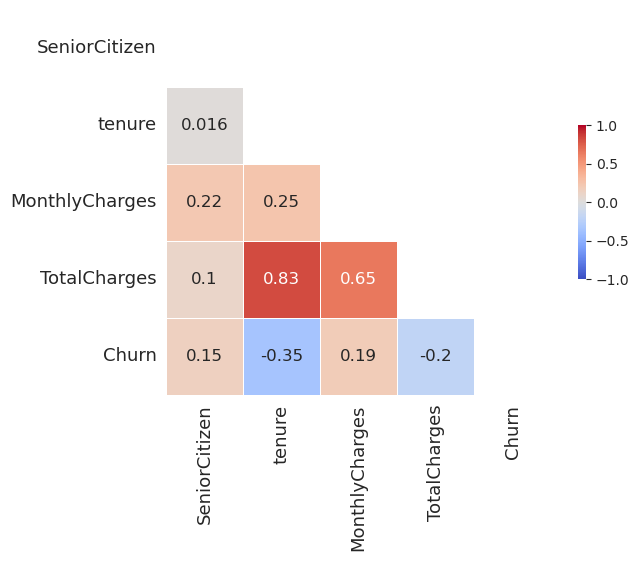

In [185]:
corr_matrix = df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']].corr()

# Set Up Mask To Hide Upper Triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_matrix,
                     mask=mask,
                     square=True,
                     linewidths=.5,
                     cmap='coolwarm',
                     cbar_kws={'shrink': .4, 'ticks': [-1, -.5, 0, 0.5, 1]},
                     vmin=-1,
                     vmax=1,
                     annot=True,
                     annot_kws={'size': 12})

# Add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation=0, fontsize=13)
ax.set_xticklabels(corr_matrix.columns, fontsize=13)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.show()


# 5. Statistical Analysis

- For supervised machine learning, it is sufficient to understand all unique data points in each column of the tabulated data. Robust statistical tests give comprehensive information about data.<br>


- Understanding the type of variables being utilized for analysis is important as it helps to choose an appropriate statistical method.

This project utilized five important variables from the target dataset to perform correlation analysis.

- **Categorical variables:** Represent qualitative data divided into categories or groups.
- **Numerical variables:** Represent quantitative data and can take on numerical values.
- **Ordinal variables:** Categorical variables with an ordered or ranked structure.
- **Dichotomous variables:** Categorical variables with only two distinct values.
- **Polytomous variables:** Categorical variables with more than two distinct categories.

**NB: Before performing any statistical test consider either using parametric or non-parametric test.**

Each of the above variables will be used to generate data insights by applying an appropriate statistical test.

## 5.1 Univariate Statistical Analysis

* **Normality and Variance test**


It is impotant to note that parametric tests are more robust compared to non parametric tests. Hence we need to asses the data if the parametric assumptions are not violeted.


Normality tests are used to determine if a dataset is normally distributed and to check how likely it is for a random variable in the dataset to be normally distributed.


There are three key numerical features in this dataset - **MonthlyCharges**, **Tenure**, and **TotalCharges**.


**Hypotheses**

* $H_{0}$: The sample has a Gaussian distribution.
* $H_{1}$: The sample does not have a Gaussian distribution.

We can not perform **Shapiro-Wilk Test** because sample size > 5000 and for this test p-value may not be accurate for N > 5000.

Hence we use **Anderson-Darling** for normality test.

* **Anderson-Darling Test**

`Critical values` in a statistical test are a range of pre-defined significance boundaries at which the $H_{0}$ cannot be rejected if the calculated statistic is less than the critical value.

Rather than just a single p-value, this test returns a critical value for a **range of different commonly used significance levels**.

In this case  - **normal/exponential** (15%, 10%, 5%, 2.5%, 1%)

In [48]:
# Perform Anderson-Darling test for each variable
variables = ['tenure', 'MonthlyCharges', 'TotalCharges']
for variable in variables:
    sample_data = df[variable]
    result = stats.anderson(sample_data, dist='norm')
    print(f"Variable: {variable}")
    print(f"Statistic: {result.statistic}")
    print(f"Critical Values: {result.critical_values}")
    print(f"Significance Levels: {result.significance_level}")
    print(f"Is Normal: {result.statistic < result.critical_values[2]}")
    print("=======================================")

Variable: tenure
Statistic: 202.31780895668817
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]
Is Normal: False
Variable: MonthlyCharges
Statistic: 170.18974892396363
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]
Is Normal: False
Variable: TotalCharges
Statistic: 345.2272642190619
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]
Is Normal: False


**- Conlusion:** At 15%, 10%, 5%, 2.5% and 1% significance levels, we can conclude that 'tenure', 'MonthlyCharges' and 'TotalCharges' we can reject null hypothesis ($H_{0}$) that the sample has a Gaussian distribution.

* **Levene test for homoscedasticity**

The test compares the variances of the different groups (in this case, the variables) and provides a test statistic and a p-value. If the p-value is less than the chosen significance level (alpha), we reject the null hypothesis of homoscedasticity, indicating that the variances are significantly different. Conversely, if the p-value is greater than alpha, we fail to reject the null hypothesis, indicating that the variances are not significantly different, suggesting homoscedasticity.


**Hypotheses:**

* $H_{0}$: The variances of the samples are equal (homoscedasticity).
    
* $H_{1}$: The variances of the samples are not equal.

In [49]:
from scipy.stats import levene

# Extract the variables into separate Series or arrays
tenure = df['tenure']
monthly_charges = df['MonthlyCharges']
total_charges = df['TotalCharges']

# Perform Levene's test
statistic, p_value = levene(tenure, monthly_charges, total_charges)

# Output the test results
print("Levene's Test")
print("-------------")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The variances are significantly different. Reject the null hypothesis of homoscedasticity.")
else:
    print("The variances are not significantly different. Fail to reject the null hypothesis of homoscedasticity.")


Levene's Test
-------------
Test Statistic: 7800.044615500039
P-value: 0.0
The variances are significantly different. Reject the null hypothesis of homoscedasticity.


**- Conclusion:** We can conclude that 'tenure', 'MonthlyCharges' and 'TotalCharges' cannot be tested by parametric methods.

## 5.2 Bivariate statistical analysis

#### 5.2.1 Numerical to Numerical relationships

We need to choose between **Pearson correlation** and **Spearman correlation**. For Pearson r correlation, both variables should be normally distributed. <BR>
    
According to the normality test, tenure, MonthlyCharges and TotalCharges datapoints are **not normally distributed** 

**Unlike the Pearson correlation**, the Spearman correlation does not assume that both datasets are **normally distributed**

Pearson correlation assumes normality, linearity and homoscedasticity. Pearson's correlation is also unable to tell the difference between dependent and independent variables

**Hypotheses:**

* $H_{0}$: there is a monotonic relationship between the samples.

* $H_{1}$: the two samples do not have monotonic relationship.

In [50]:
def cal_spearmanr(c1, c2):

    alpha = 0.05

    correlation, p_value = stats.spearmanr(df[c1], df[c2])

    print(f'{c1}, {c2} correlation : {correlation}, p : {p_value}')

    if p_value > alpha:
        print(' reject Null hypothesis')
    else:
        print('Accept Null hypothesis')

In [51]:
cal_spearmanr('tenure','MonthlyCharges')
print('===============================')
cal_spearmanr('tenure','TotalCharges')
print('===============================')
cal_spearmanr('MonthlyCharges','TotalCharges')

tenure, MonthlyCharges correlation : 0.2753387429197595, p : 1.535767470847339e-122
Accept Null hypothesis
tenure, TotalCharges correlation : 0.8891770805365491, p : 0.0
Accept Null hypothesis
MonthlyCharges, TotalCharges correlation : 0.6380321757758154, p : 0.0
Accept Null hypothesis


**- Conclusion:** At 5% significance level we can conclude that the key numerical variables have a monotonic relationship.

#### 5.2.2 Numerical to Categorical i.e,. target variable (Dichotomous)

* **Spearman Correlation Test**

The Spearman correlation test is used to assess the strength and direction of the monotonic relationship between two continuous or ordinal variables. It measures the degree to which the variables change together, regardless of the specific form of the relationship (linear or non-linear).<br>

In our context,  'tenure', 'MonthlyCharges', and 'TotalCharges', are commonly referred to as predictor variables, independent variables, or features while 'Churn' is the outcome or target variable. We need to examin how the predictor variables (tenure, MonthlyCharges, and TotalCharges) are related to the likelihood of churn (the outcome variable). We are going to use Spearman test (non-parametrice), since the datapoints are not normaly distributed as tested earlier. In other words, the Spearman correlation coefficient provides a measure of the strength and direction of the monotonic relationship, while the Mann-Whitney U test determines if the distributions of the two groups are significantly different.<br>

**Hypotheses:**

* $H_{0}$: there is a monotonic relationship between the samples.

* $H_{1}$: the two samples do not have monotonic relationship.

In [52]:
from scipy.stats import spearmanr

# Compute the Spearman correlation coefficient and p-value for 'tenure' and 'Churn'
corr_t, p_value_t = spearmanr(df['tenure'], df['Churn'])
print(f"Spearman correlation coefficient for 'tenure' and 'Churn': {corr_t}")
print(f"P-value for 'tenure' and 'Churn': {p_value_t}")
if p_value_t > corr_t:
    print("Accept null hypothesis. Linear relationship")
else:
    print("Reject null hypothesis. Non-linear relationship")

print("=======================================================")     
    
# Compute the Spearman correlation coefficient and p-value for 'MonthlyCharges' and 'Churn'
corr_m, p_value_m = spearmanr(df['MonthlyCharges'], df['Churn'])
print(f"Spearman correlation coefficient for 'MonthlyCharges' and 'Churn': {corr_m}")
print(f"P-value for 'MonthlyCharges' and 'Churn': {p_value_m}")
if p_value_m > corr_m:
    print("Accept null hypothesis. Linear relationship")
else:
    print("Reject null hypothesis. Non-linear relationship")

print("=======================================================")  
    
# Compute the Spearman correlation coefficient and p-value for 'TotalCharges' and 'Churn'
corr_tc, p_value_tc = spearmanr(df['TotalCharges'], df['Churn'])
print(f"Spearman correlation coefficient for 'TotalCharges' and 'Churn': {corr_tc}")
print(f"P-value for 'TotalCharges' and 'Churn': {p_value_tc}")
if p_value_tc > corr_tc:
    print("Accept null hypothesis. Linear relationship")
else:
    print("Reject null hypothesis. Non-linear relationship")


Spearman correlation coefficient for 'tenure' and 'Churn': -0.3696593066915767
P-value for 'tenure' and 'Churn': 1.2903783362625457e-226
Accept null hypothesis. Linear relationship
Spearman correlation coefficient for 'MonthlyCharges' and 'Churn': 0.184166625325272
P-value for 'MonthlyCharges' and 'Churn': 1.0881889367979897e-54
Reject null hypothesis. Non-linear relationship
Spearman correlation coefficient for 'TotalCharges' and 'Churn': -0.23219034179809916
P-value for 'TotalCharges' and 'Churn': 1.0239887973384982e-86
Accept null hypothesis. Linear relationship


**- Conclusion: _Tenure_ and _Total Charges_ are potential predictors for Churn**

* **Mann-Whitney U Test**

The Mann-Whitney U test is a **nonparametric** statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.  the **_independent samples t-test_** in an alternative parametric test.

The test determines whether the medians of two or more groups are different.

**NB** : For the test to be effective, it requires at least 20 observations in each data sample.<br>

* Fail to Reject H0: Sample distributions are equal. (or sample distributions are likely drawn from the same population)
* Reject H0: Sample distributions are not equal.

Hypothesis:

* $H_{0}$: population medians are equal
* $H_{1}$: population medians are not equal

In [53]:
def mannwhitneyu_correlation(feature1):
    stat, p_value = stats.mannwhitneyu(df[feature1], (df['Churn'] == 'Yes').astype(int))
    print(f"Correlation between {feature1} and Churn")
    print('Statistics = %.5f, p = %.5f' % (stat, p_value))

    # interpret the significance
    alpha = 0.05
    if p_value > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
    print('======================================\n') 

In [54]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for num in numerical_features:
    print(f"Correlation with {num}")
    mannwhitneyu_correlation(num)


Correlation with tenure
Correlation between tenure and Churn
Statistics = 49449024.00000, p = 0.00000
Different distribution (reject H0)

Correlation with MonthlyCharges
Correlation between MonthlyCharges and Churn
Statistics = 49449024.00000, p = 0.00000
Different distribution (reject H0)

Correlation with TotalCharges
Correlation between TotalCharges and Churn
Statistics = 49449024.00000, p = 0.00000
Different distribution (reject H0)



**- Conclusion: The conclusion we can draw from these results is that while there is a positive monotonic relationship between the variables, there are differences in the medians of the two groups (predictors and target variable) being compared. This suggests that factors other than the central tendency might be influencing the relationship between the variables.**

Let us perform an extended test to asses if there  is a difference in atleast one of the predictors.


## 5.3 Multivariate statistical analysis

* **Kruskal-Wallis test**

Kruskal-Wallis test is non-parametric alternative to ANOVA: It is used to compare the distributions of three or more independent groups. It is suitable when the assumptions of ANOVA (normality and equal variances) are violated. The test is based on ranks rather than the actual data values.


_Let us perform the Kruskal-Wallis test on the variables 'tenure', 'MonthlyCharges', and 'TotalCharges' to check if they are independent from one another._

In [55]:
from scipy.stats import kruskal

# Extract the variables into separate Series or arrays
tenure = df['tenure']
monthly_charges = df['MonthlyCharges']
total_charges = df['TotalCharges']

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(tenure, monthly_charges, total_charges)

# Output the test results
print("Kruskal-Wallis Test")
print("-------------------")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant difference in at least one of the variables.")
else:
    print("There is no significant difference in the variables.")


Kruskal-Wallis Test
-------------------
Test Statistic: 13236.502813218167
P-value: 0.0
There is a significant difference in at least one of the variables.


* **Conclusion: At 5% significance level We can conclude that there is a difference in atleast one predictor variables (tenure, MonthlyCharges and TotalCharges).**

## 5.4 Interaction Analysis

### 5.4.1 Bivariate Analysis

* When testing for interaction between two categorical variables in one column, a common statistical test is the **chi-square test of independence**. This test evaluates whether there is a relationship between the two categorical variables and determines if this relationship is statistically significant.

Chi-square detect independence between 2 categorical variables, 2x2 or 2xMany

Test statistic in the context of the chi-squared distribution with the requisite number of degrees of freedom

* If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
* If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha):

* If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
* If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

### 5.4.2 Multicollinearity

For categorical variables, multicollinearity can be detected with **Spearman rank correlation coefficient** (ordinal variables) and **chi-square** test (nominal variables).

**Chi-Square Test:**<br>
Perform a chi-square test of independence for each pair of categorical variables to assess the association between them. The chi-square test will determine if there is a significant relationship between the variables.


In [56]:
def calculate_chi_square(feature1, feature2='Churn'):
    print(f"Correlation between **{feature1}** and **{feature2}**")
    crosstab = pd.crosstab(df[feature1], df[feature2])
    
    stat, p, dof, expected = stats.chi2_contingency(crosstab, correction=True)
    print(f'p-value : {p}, degree of freedom: {dof}')

    # interpret test-statistic
    prob = 0.95
    critical = stats.chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

    # interpret p-value
    alpha = 1.0 - prob

    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('==========================================\n')


In [57]:
calculate_chi_square('PaymentMethod','MultipleLines')


calculate_chi_square('PaymentMethod','PhoneService')


calculate_chi_square('PaymentMethod','Contract')

Correlation between **PaymentMethod** and **MultipleLines**
p-value : 1.216564211436556e-81, degree of freedom: 6
probability=0.950, critical=12.592, stat=392.377
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)

Correlation between **PaymentMethod** and **PhoneService**
p-value : 0.8536395500879111, degree of freedom: 3
probability=0.950, critical=7.815, stat=0.783
Independent (fail to reject H0)
significance=0.050, p=0.854
Independent (fail to reject H0)

Correlation between **PaymentMethod** and **Contract**
p-value : 6.908556640756664e-213, degree of freedom: 6
probability=0.950, critical=12.592, stat=1000.518
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)



In [58]:
print("Chi-Square Correlation Between Dichotomous Features with Target : Churn")

dichotomous_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in dichotomous_cols:
    if col in df.columns:
        calculate_chi_square(col)
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")

Chi-Square Correlation Between Dichotomous Features with Target : Churn
Correlation between **gender** and **Churn**
p-value : 0.4904884707065509, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.475
Independent (fail to reject H0)
significance=0.050, p=0.490
Independent (fail to reject H0)

Correlation between **Partner** and **Churn**
p-value : 3.97379757451591e-36, degree of freedom: 1
probability=0.950, critical=3.841, stat=157.503
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)

Correlation between **Dependents** and **Churn**
p-value : 2.0196592017051303e-42, degree of freedom: 1
probability=0.950, critical=3.841, stat=186.322
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)

Correlation between **PhoneService** and **Churn**
p-value : 0.34992398942431924, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.874
Independent (fail to reject H0)
significance=0.050, p=0.350
Independent (fail to reject H0)

Correl

**With 5% significance level 'PhoneService' and 'gender' features are not dependent with the target : Churn**

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [61]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [62]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [63]:
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    print(col, check_outlier(df, col))


SeniorCitizen False
tenure False
MonthlyCharges False
TotalCharges False
Churn False


### Export cleaned data to new excel file

In [64]:
# Define the folder and file name and path
folder_path = 'C:\\Users\\TMB CO\\OneDrive\\Desktop\\MACHINE LEARNING PROJECT (GITHUB)\\Machine-learning-end-to-end-project/'
file_name = 'cleaned_data.xlsx'
file_path = folder_path + file_name
cleaned_data=df
# Export the DataFrame to Excel
cleaned_data.to_excel(file_path, index=False)

print(f"Data exported to '{file_path}' successfully.")


Data exported to 'C:\Users\TMB CO\OneDrive\Desktop\MACHINE LEARNING PROJECT (GITHUB)\Machine-learning-end-to-end-project/cleaned_data.xlsx' successfully.
